In [1]:
import pandas as pd

# Importing the Bechdel test dataset
bechdel_url = 'http://bechdeltest.com/api/v1/getAllMovies'
bechdel_df = pd.read_json(bechdel_url)

# Display the first few rows of the dataset
bechdel_df.head()


,rating,imdbid,title,id,year
0,0,3155794,Passage de Venus,9602,1874
1,0,14495706,La Rosace Magique,9804,1877
2,0,2221420,Sallie Gardner at a Gallop,9603,1878
3,0,12592084,Le singe musicien,9806,1878
4,0,7816420,Athlete Swinging a Pick,9816,1881


In [2]:
# Create a new dataframe with movies released after 1950
filtered_bechdel_df = bechdel_df[bechdel_df['year'] >= 1980]

# Rename the 'rating' column to 'Bechdel Score'
filtered_bechdel_df = filtered_bechdel_df.rename(columns={'rating': 'Bechdel Score'})

# Display the first few rows of the new dataframe
filtered_bechdel_df.head()


,Bechdel Score,imdbid,title,id,year
1943,1,0080455,"Blues Brothers, The",208,1980
1944,3,0080716,Fame,360,1980
1945,0,0080684,Star Wars: Episode V - The Empire Strikes Back,670,1980
1946,3,0079579,Moskva slezam ne verit,684,1980
1947,3,0080319,Nine to Five (9 to 5),863,1980


In [3]:
# Convert the 'year' column to a datetime object
filtered_bechdel_df['year'] = pd.to_datetime(filtered_bechdel_df['year'], format='%Y')

# Change the 'Bechdel Score' column to a categorical variable
filtered_bechdel_df['Bechdel Score'] = filtered_bechdel_df['Bechdel Score'].astype('category')

# Display the first few rows of the dataframe to verify changes
filtered_bechdel_df.head()


,Bechdel Score,imdbid,title,id,year
1943,1,0080455,"Blues Brothers, The",208,1980-01-01
1944,3,0080716,Fame,360,1980-01-01
1945,0,0080684,Star Wars: Episode V - The Empire Strikes Back,670,1980-01-01
1946,3,0079579,Moskva slezam ne verit,684,1980-01-01
1947,3,0080319,Nine to Five (9 to 5),863,1980-01-01


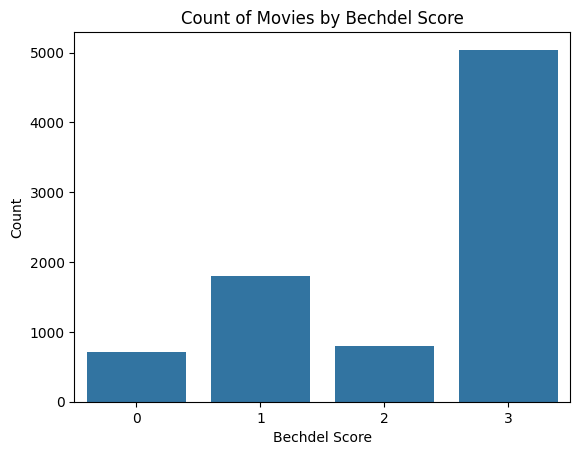

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the Bechdel Score
sns.countplot(x='Bechdel Score', data=filtered_bechdel_df)

# Add labels and title
plt.xlabel('Bechdel Score')
plt.ylabel('Count')
plt.title('Count of Movies by Bechdel Score')

# Display the plot
plt.show()


Total number of movies: 8346
Number of movies with Bechdel score 0: 707
Number of movies with Bechdel score 1: 1801
Number of movies with Bechdel score 2: 796
Number of movies with Bechdel score 3: 5042


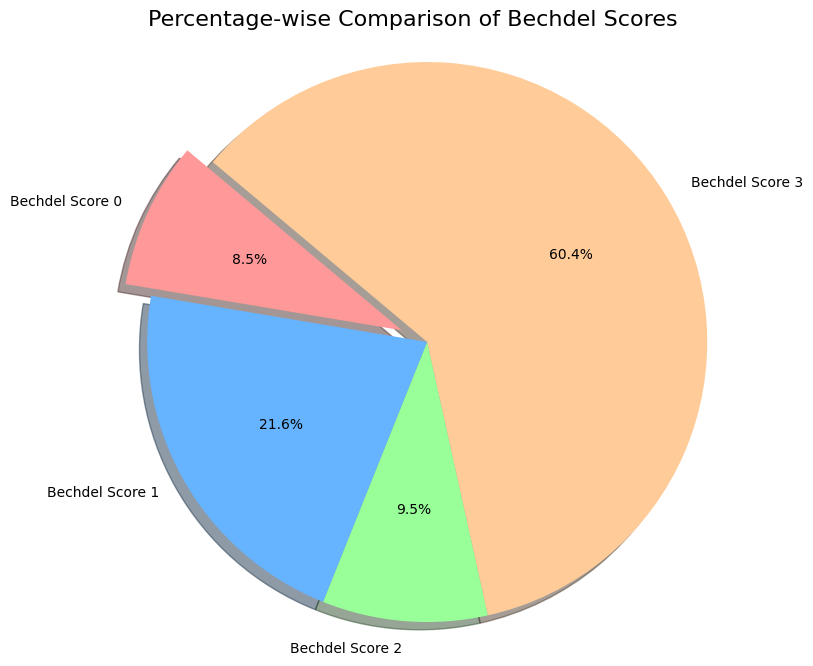

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'year' column is in datetime format
filtered_bechdel_df['year'] = pd.to_datetime(filtered_bechdel_df['year'], format='%Y')


# Count the total number of movies
total_movies = filtered_bechdel_df.shape[0]

# Count the number of movies with each Bechdel score
bechdel_score_counts = filtered_bechdel_df['Bechdel Score'].value_counts().sort_index()

# Print the total number of movies and the counts for each Bechdel score
print(f"Total number of movies: {total_movies}")
print(f"Number of movies with Bechdel score 0: {bechdel_score_counts.get(0, 0)}")
print(f"Number of movies with Bechdel score 1: {bechdel_score_counts.get(1, 0)}")
print(f"Number of movies with Bechdel score 2: {bechdel_score_counts.get(2, 0)}")
print(f"Number of movies with Bechdel score 3: {bechdel_score_counts.get(3, 0)}")

# Plot the pie chart for percentage-wise comparison of Bechdel scores
labels = ['Bechdel Score 0', 'Bechdel Score 1', 'Bechdel Score 2', 'Bechdel Score 3']
sizes = [bechdel_score_counts.get(0, 0), bechdel_score_counts.get(1, 0), bechdel_score_counts.get(2, 0), bechdel_score_counts.get(3, 0)]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0, 0)  # explode the first slice

plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage-wise Comparison of Bechdel Scores ', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


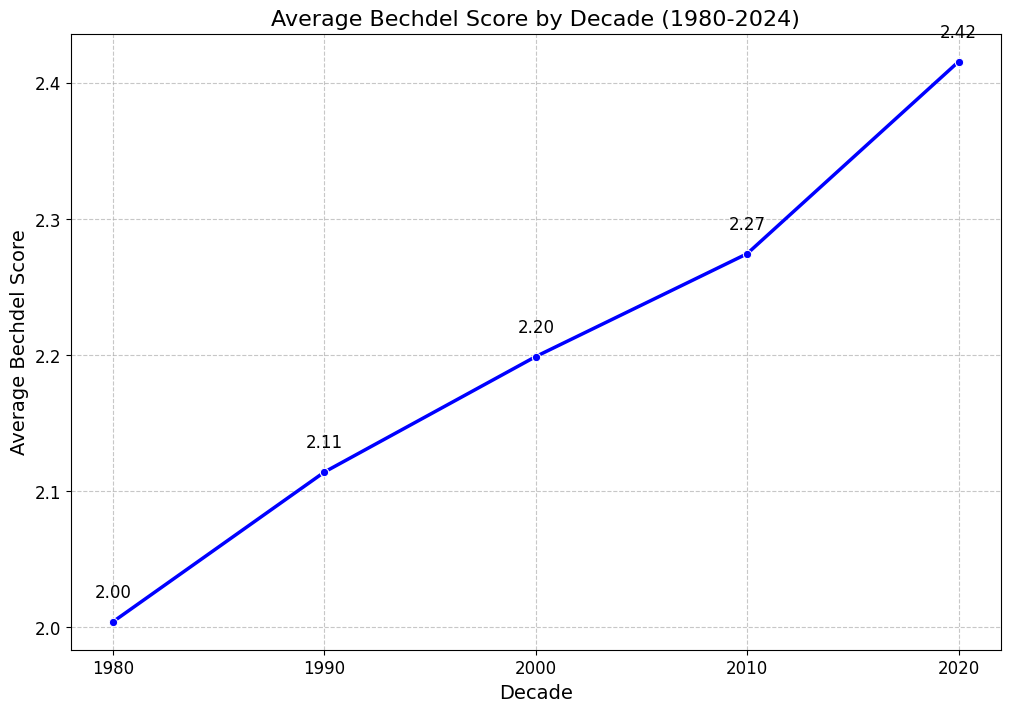

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'year' column is in datetime format
filtered_bechdel_df['year'] = pd.to_datetime(filtered_bechdel_df['year'], format='%Y')

# Extract the decade from the 'year' column
filtered_bechdel_df['decade'] = (filtered_bechdel_df['year'].dt.year // 10) * 10

# Convert 'Bechdel Score' to numerical type for calculation
filtered_bechdel_df['Bechdel Score'] = filtered_bechdel_df['Bechdel Score'].astype(int)

# Group by decade and calculate the average Bechdel score
decade_avg_bechdel = filtered_bechdel_df.groupby('decade')['Bechdel Score'].mean().reset_index()

# Plot the average Bechdel score by decade
plt.figure(figsize=(12, 8))
sns.lineplot(data=decade_avg_bechdel, x='decade', y='Bechdel Score', marker='o', color='b', linewidth=2.5)

# Annotate data points
for i in range(decade_avg_bechdel.shape[0]):
    plt.text(x=decade_avg_bechdel.decade[i], y=decade_avg_bechdel['Bechdel Score'][i] + 0.018,
             s=f"{decade_avg_bechdel['Bechdel Score'][i]:.2f}",
             fontsize=12, ha='center')

# Add labels and title
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average Bechdel Score', fontsize=14)
plt.title('Average Bechdel Score by Decade (1980-2024)', fontsize=16)
plt.xticks(decade_avg_bechdel['decade'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


<ipython-input-7-6466553617a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_period_df['Bechdel Score'] = covid_period_df['Bechdel Score'].astype(int)


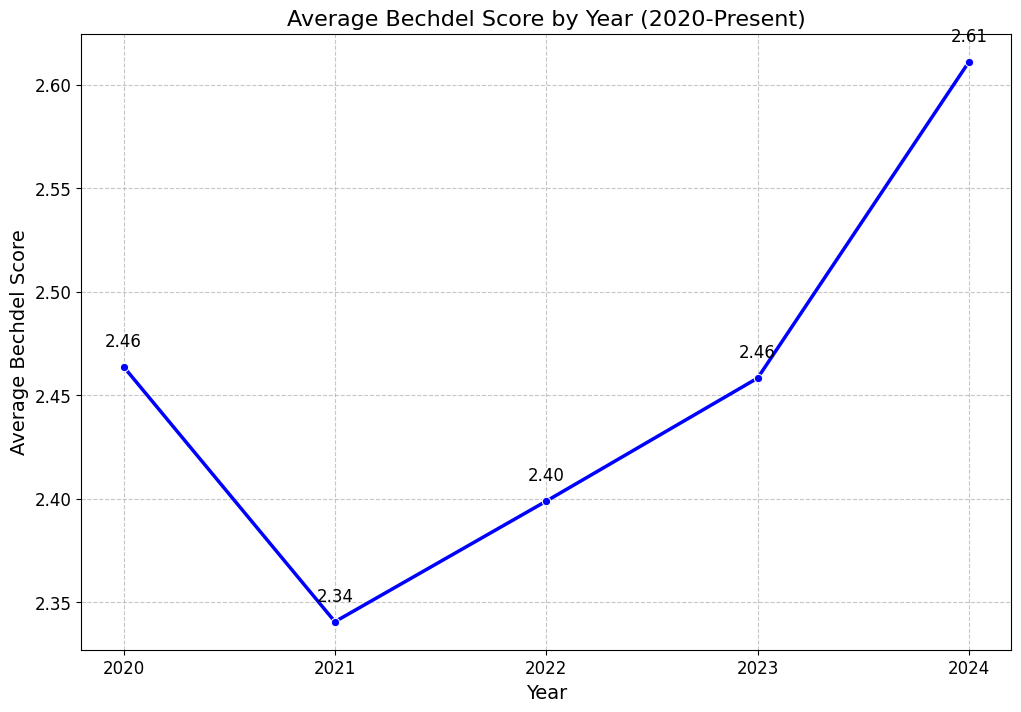

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'year' column is in datetime format
filtered_bechdel_df['year'] = pd.to_datetime(filtered_bechdel_df['year'], format='%Y')

# Filter the dataset for movies released after 2019
covid_period_df = filtered_bechdel_df[filtered_bechdel_df['year'] >= '2020-01-01']

# Convert 'Bechdel Score' to numerical type for calculation
covid_period_df['Bechdel Score'] = covid_period_df['Bechdel Score'].astype(int)

# Group by year and calculate the average Bechdel score
covid_avg_bechdel = covid_period_df.groupby(covid_period_df['year'].dt.year)['Bechdel Score'].mean().reset_index()

# Plot the average Bechdel score by year after COVID-19
plt.figure(figsize=(12, 8))
sns.lineplot(data=covid_avg_bechdel, x='year', y='Bechdel Score', marker='o', color='b', linewidth=2.5)

# Annotate data points with a small vertical offset
for i in range(covid_avg_bechdel.shape[0]):
    plt.text(x=covid_avg_bechdel.year[i], y=covid_avg_bechdel['Bechdel Score'][i] + 0.01,
             s=f"{covid_avg_bechdel['Bechdel Score'][i]:.2f}",
             fontsize=12, ha='center')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Bechdel Score', fontsize=14)
plt.title('Average Bechdel Score by Year (2020-Present)', fontsize=16)
plt.xticks(covid_avg_bechdel['year'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


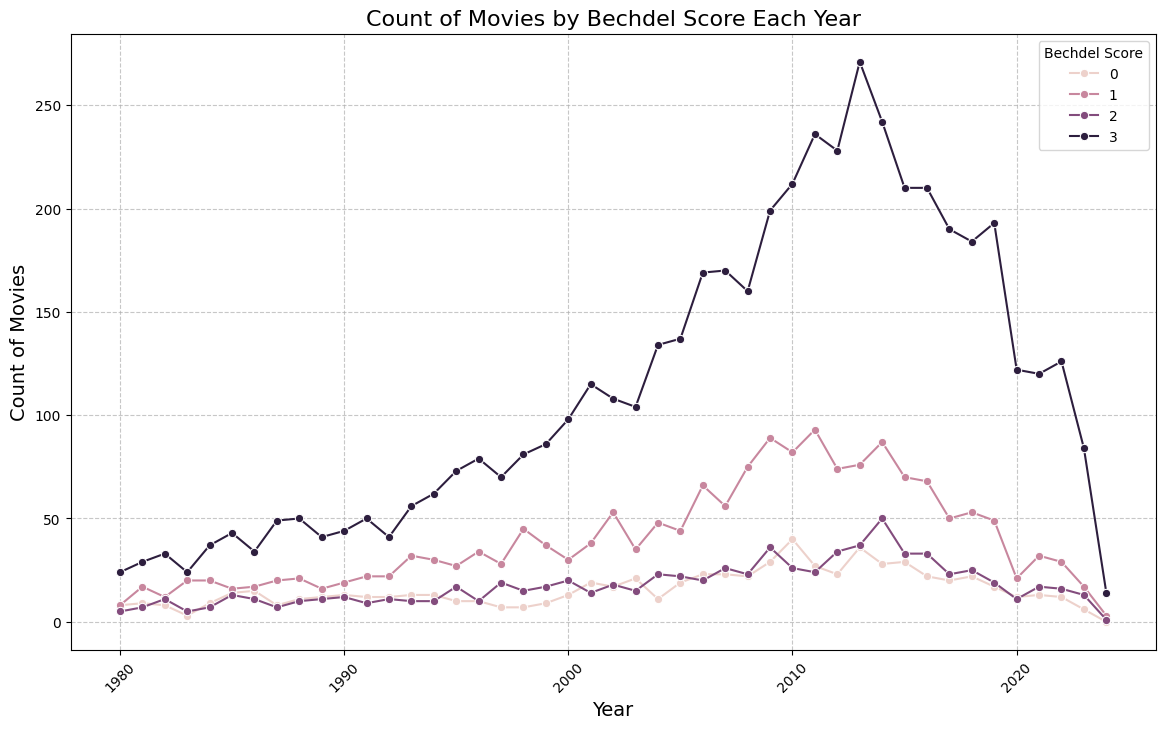

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'year' column is in datetime format
filtered_bechdel_df['year'] = pd.to_datetime(filtered_bechdel_df['year'], format='%Y')

# Count the number of movies with each Bechdel score for each year
bechdel_counts = filtered_bechdel_df.groupby([filtered_bechdel_df['year'].dt.year, 'Bechdel Score']).size().unstack(fill_value=0)

# Reset index for better handling in plotting
bechdel_counts = bechdel_counts.reset_index()

# Melt the dataframe for easier plotting
bechdel_counts_melted = bechdel_counts.melt(id_vars='year', value_vars=[0, 1, 2, 3], var_name='Bechdel Score', value_name='Count')

# Plot the counts of movies with different Bechdel scores over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=bechdel_counts_melted, x='year', y='Count', hue='Bechdel Score', marker='o')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Movies', fontsize=14)
plt.title('Count of Movies by Bechdel Score Each Year', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Bechdel Score')

# Show the plot
plt.show()


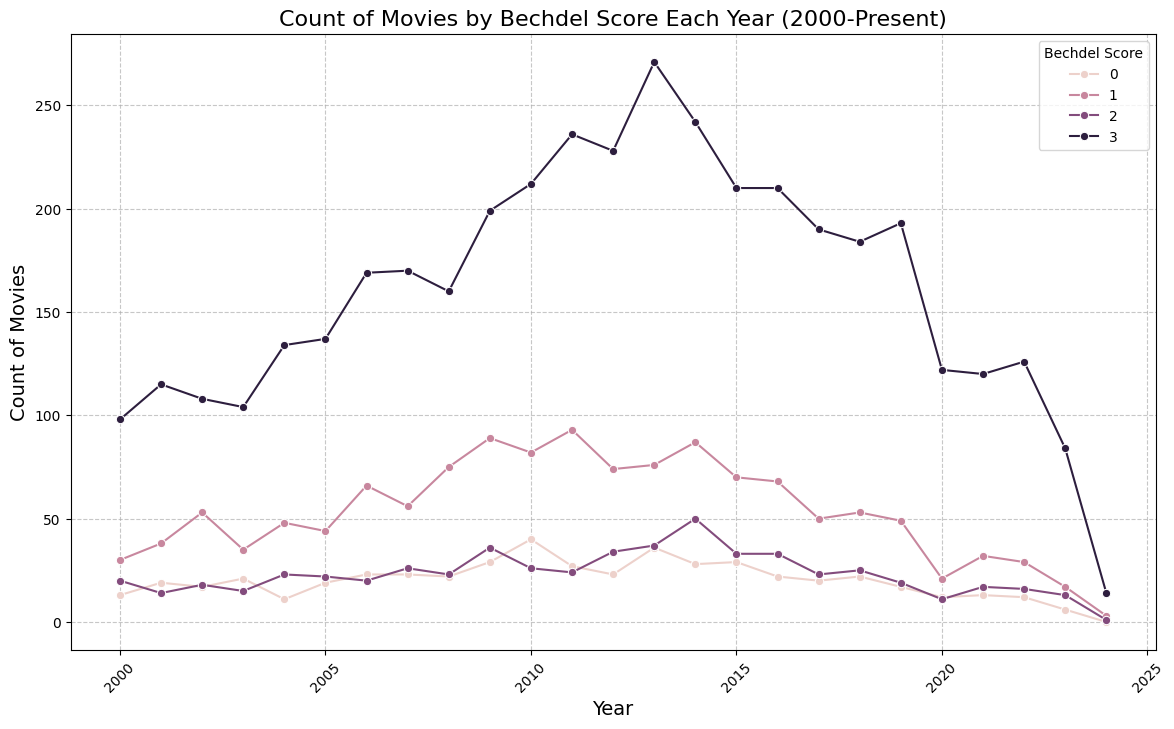

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'year' column is in datetime format
filtered_bechdel_df['year'] = pd.to_datetime(filtered_bechdel_df['year'], format='%Y')

# Filter the dataset for movies released after 2000
post_2000_df = filtered_bechdel_df[filtered_bechdel_df['year'] >= '2000-01-01']

# Count the number of movies with each Bechdel score for each year
bechdel_counts = post_2000_df.groupby([post_2000_df['year'].dt.year, 'Bechdel Score']).size().unstack(fill_value=0)

# Reset index for better handling in plotting
bechdel_counts = bechdel_counts.reset_index()

# Melt the dataframe for easier plotting
bechdel_counts_melted = bechdel_counts.melt(id_vars='year', value_vars=[0, 1, 2, 3], var_name='Bechdel Score', value_name='Count')

# Plot the counts of movies with different Bechdel scores over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=bechdel_counts_melted, x='year', y='Count', hue='Bechdel Score', marker='o')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Movies', fontsize=14)
plt.title('Count of Movies by Bechdel Score Each Year (2000-Present)', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Bechdel Score')

# Show the plot
plt.show()


In [10]:
# Load the new dataset
new_dataset_url = '/content/imdb_movie_data_2023.csv'  # Replace with the actual URL or file path
new_df = pd.read_csv(new_dataset_url)

# Display the first few rows of the new dataset to understand its structure
new_df.head()

# Data cleaning steps
# Removing leading/trailing whitespace from column names
new_df.columns = new_df.columns.str.strip()

# Removing leading/trailing whitespace from the 'title' column
new_df['title'] = new_df['title'].str.strip()

# Fill NA values with appropriate default values
new_df['Rating'] = new_df['Rating'].fillna(0.0)
new_df['Votes'] = new_df['Votes'].fillna(0).astype(int)
new_df['Meta Score'] = new_df['Meta Score'].fillna(0)
new_df['Genre'] = new_df['Genre'].fillna('Unknown')
new_df['PG Rating'] = new_df['PG Rating'].fillna('Not Rated')
new_df['Year'] = new_df['Year'].fillna(0).astype(int)
new_df['Duration'] = new_df['Duration'].fillna('Unknown')
new_df['Cast'] = new_df['Cast'].fillna('Unknown')
new_df['Director'] = new_df['Director'].fillna('Unknown')

# Convert relevant columns to appropriate data types
new_df['Rating'] = new_df['Rating'].astype(float)
new_df['Votes'] = new_df['Votes'].astype(int)
new_df['Meta Score'] = pd.to_numeric(new_df['Meta Score'], errors='coerce')

# Display the cleaned dataframe
new_df.head()

# Merge the datasets on the 'title' column
merged_df = pd.merge(filtered_bechdel_df, new_df, on='title', how='inner')

# Remove duplicates in the 'title' column
merged_df = merged_df.drop_duplicates(subset='title')

# Display the first few rows of the merged dataframe
merged_df.head()




,Bechdel Score,imdbid,title,id,year,decade,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,0,0080684,Star Wars: Episode V - The Empire Strikes Back,670,1980-01-01,1980,8.7,1400000,82.0,"Action, Adventure, Fantasy",PG,1980,2h 4m,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",Irvin Kershner
1,3,0080339,Airplane!,873,1980-01-01,1980,7.7,256000,78.0,Comedy,PG,1980,1h 28m,"Robert Hays, Julie Hagerty, Leslie Nielsen, Ka...",Jim AbrahamsDavid ZuckerJerry Zucker
2,1,0081398,Raging Bull,1437,1980-01-01,1980,8.1,373000,90.0,"Biography, Drama, Sport",R,1980,2h 9m,"Robert De Niro, Cathy Moriarty, Joe Pesci, Fra...",Martin Scorsese
3,3,0080745,Flash Gordon,3858,1980-01-01,1980,6.5,60000,58.0,"Action, Adventure, Sci-Fi",PG,1980,1h 51m,"Sam J. Jones, Melody Anderson, Max von Sydow, ...",Mike Hodges
4,2,0080487,Caddyshack,10875,1980-01-01,1980,7.2,125000,48.0,"Comedy, Sport",13+,1980,1h 38m,"Chevy Chase, Rodney Dangerfield, Bill Murray, ...",Harold Ramis


In [11]:
# Display the number of rows and columns in the new dataset
print("New dataset shape:", new_df.shape)

# Display the number of rows and columns in the Bechdel dataset
print("Bechdel dataset shape:", filtered_bechdel_df.shape)

# After merging the datasets, display the number of rows and columns in the merged dataset
print("Merged dataset shape:", merged_df.shape)


New dataset shape: (1950, 10)
Bechdel dataset shape: (8346, 6)
Merged dataset shape: (1032, 15)


In [12]:
import pandas as pd

# Ensure the Genre column is exploded and cleaned
genre_exploded_df = merged_df.assign(Genre=merged_df['Genre'].str.split(',')).explode('Genre')
genre_exploded_df['Genre'] = genre_exploded_df['Genre'].str.strip()

# Count the number of movies in each genre
genre_counts = genre_exploded_df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Display the resulting counts
print(genre_counts)


        Genre  Count
0       Drama    449
1      Action    376
2      Comedy    353
3   Adventure    321
4    Thriller    175
5       Crime    162
6      Sci-Fi    148
7     Romance    131
8     Fantasy    107
9      Horror    104
10    Mystery    100
11  Animation     64
12  Biography     60
13     Family     55
14    History     30
15      Music     22
16      Sport     17
17    Unknown     16
18        War     15
19    Musical     10
20    Western      7


<ipython-input-13-8f6a42e63c30>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bechdel Score', y='Genre', data=genre_bechdel_score, palette='viridis')


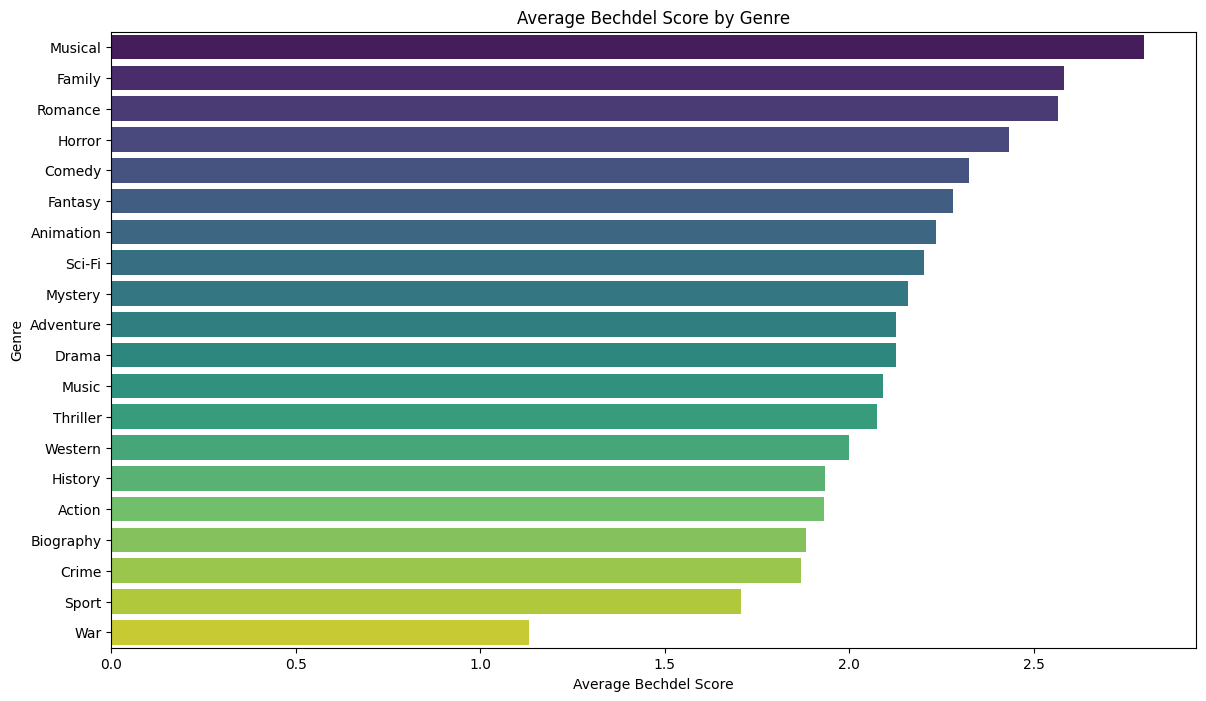

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the genre column is a string
merged_df['Genre'] = merged_df['Genre'].astype(str)

# Split the genres and explode into separate rows
merged_df_exploded = merged_df.assign(Genre=merged_df['Genre'].str.split(',')).explode('Genre')

# Remove leading/trailing whitespace from the genres
merged_df_exploded['Genre'] = merged_df_exploded['Genre'].str.strip()

# Ensure 'Bechdel Score' is converted to an integer type
merged_df_exploded['Bechdel Score'] = merged_df_exploded['Bechdel Score'].astype(int)

# Filter out the 'Unknown' genre
merged_df_exploded = merged_df_exploded[merged_df_exploded['Genre'] != 'Unknown']

# Calculate the average Bechdel score for each genre
genre_bechdel_score = merged_df_exploded.groupby('Genre')['Bechdel Score'].mean().reset_index()

# Sort the genres by average Bechdel Score
genre_bechdel_score = genre_bechdel_score.sort_values(by='Bechdel Score', ascending=False)

# Plot the average Bechdel Score by genre
plt.figure(figsize=(14, 8))
sns.barplot(x='Bechdel Score', y='Genre', data=genre_bechdel_score, palette='viridis')
plt.xlabel('Average Bechdel Score')
plt.ylabel('Genre')
plt.title('Average Bechdel Score by Genre')
plt.show()


In [14]:
import pandas as pd

# Load the additional dataset
additional_dataset_url = '/content/budget_data.csv'  # Replace with the actual URL or file path
additional_df = pd.read_csv(additional_dataset_url)

# Display the first few rows of the additional dataset to understand its structure
print("Additional Dataset:")
print(additional_df.head())

# Merge the datasets on the 'title' column
final_merged_df = pd.merge(merged_df, additional_df, on='title', how='inner')

# Remove duplicates in the 'title' column
final_merged_df = final_merged_df.drop_duplicates(subset='title')

# Display the first few rows of the final merged dataframe
print("Final Merged Dataset:")
print(final_merged_df.head())

# Display the shape of the final merged dataset
print("Final Merged Dataset Shape:", final_merged_df.shape)


Additional Dataset:
                                         title  Production Budget  \
0         Star Wars Ep. VII: The Force Awakens          533200000   
1                     Avatar: The Way of Water          460000000   
2        Indiana Jones and the Dial of Destiny          402300000   
3                            Avengers: Endgame          400000000   
4  Pirates of the Caribbean: On Stranger Tides          379000000   

   Domestic Gross  Worldwide Gross  
0       936662225       2064615817  
1       684075767       2317514386  
2       174480468        383963057  
3       858373000       2748242781  
4       241071802       1045713802  
Final Merged Dataset:
   Bechdel Score   imdbid                    title     id       year  decade  \
0              3  0080339                Airplane!    873 1980-01-01    1980   
1              1  0081398              Raging Bull   1437 1980-01-01    1980   
2              3  0080745             Flash Gordon   3858 1980-01-01    1980   
3

<ipython-input-15-f42fa3e8a94f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bechdel Score', y='Average Total Gross', data=bechdel_gross, palette='viridis')


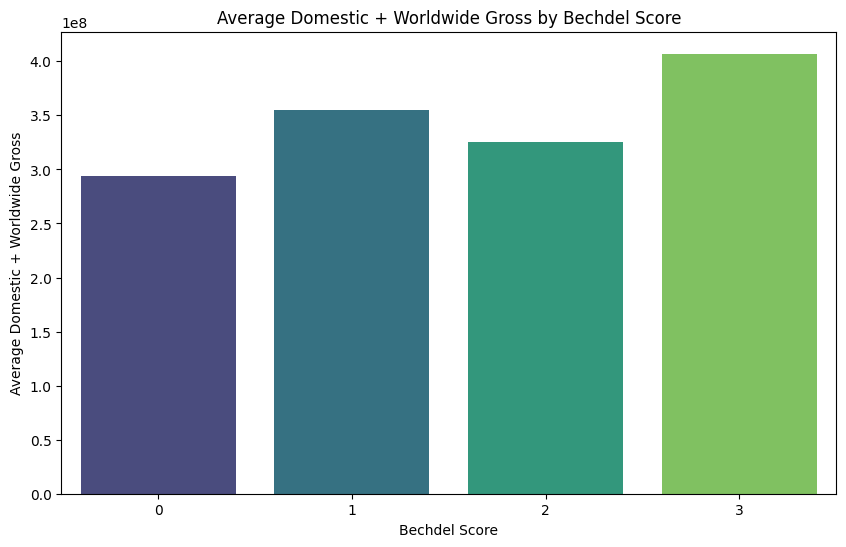

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Bechdel Score' is an integer
final_merged_df['Bechdel Score'] = final_merged_df['Bechdel Score'].astype(int)

# Calculate the total gross (domestic + worldwide) for each movie
final_merged_df['Total Gross'] = final_merged_df['Domestic Gross'] + final_merged_df['Worldwide Gross']

# Group by Bechdel score and calculate the average total gross
bechdel_gross = final_merged_df.groupby('Bechdel Score')['Total Gross'].mean().reset_index()

# Rename columns for clarity
bechdel_gross.columns = ['Bechdel Score', 'Average Total Gross']

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Bechdel Score', y='Average Total Gross', data=bechdel_gross, palette='viridis')
plt.xlabel('Bechdel Score')
plt.ylabel('Average Domestic + Worldwide Gross')
plt.title('Average Domestic + Worldwide Gross by Bechdel Score')
plt.show()


<ipython-input-16-a17be5e4ae95>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bechdel Score', y='Average_Total_Gross', data=bechdel_analysis, palette='viridis', ax=ax1)


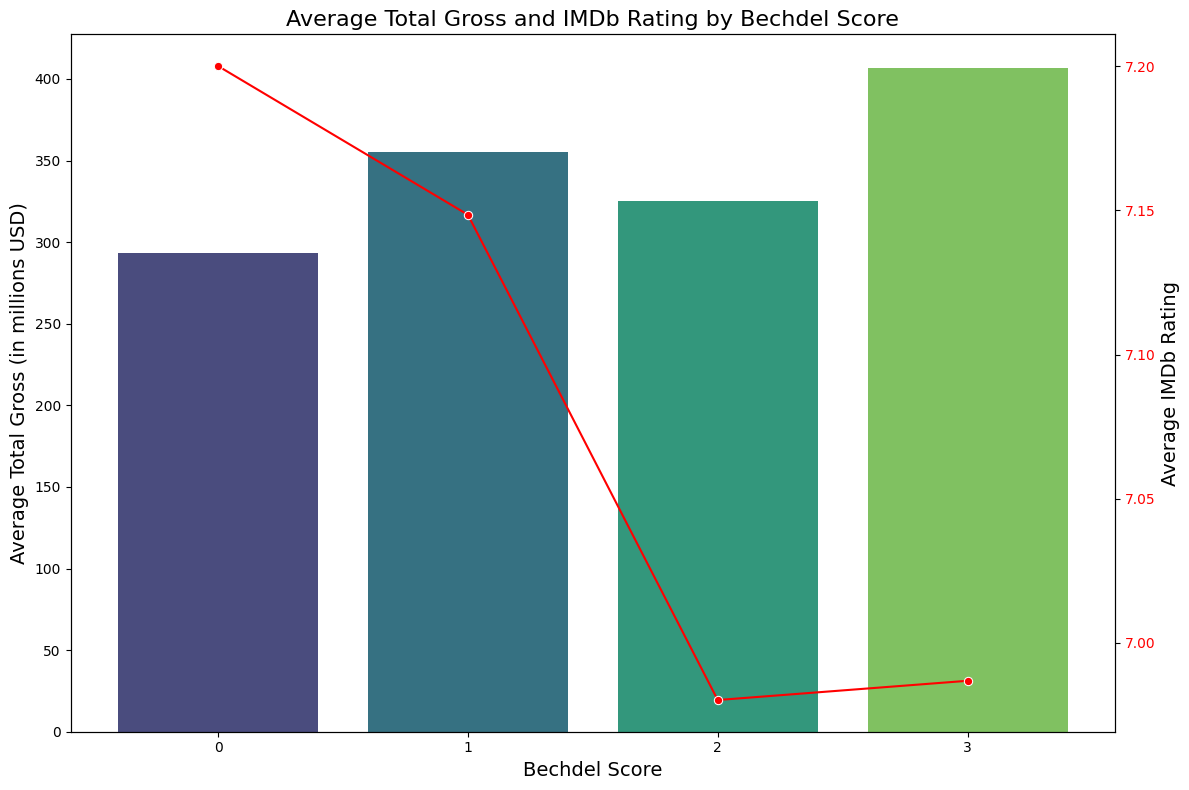

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Bechdel Score' is an integer
final_merged_df['Bechdel Score'] = final_merged_df['Bechdel Score'].astype(int)

# Convert the financial gross values to millions of USD
final_merged_df['Domestic Gross'] = final_merged_df['Domestic Gross'] / 1_000_000
final_merged_df['Worldwide Gross'] = final_merged_df['Worldwide Gross'] / 1_000_000
final_merged_df['Total Gross'] = final_merged_df['Domestic Gross'] + final_merged_df['Worldwide Gross']

# Group by Bechdel score and calculate the average total gross and average IMDb rating
bechdel_analysis = final_merged_df.groupby('Bechdel Score').agg(
    Average_Total_Gross=('Total Gross', 'mean'),
    Average_IMDb_Rating=('Rating', 'mean')
).reset_index()

# Plot the average total gross and average IMDb rating by Bechdel score
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the average total gross
sns.barplot(x='Bechdel Score', y='Average_Total_Gross', data=bechdel_analysis, palette='viridis', ax=ax1)
ax1.set_xlabel('Bechdel Score', fontsize=14)
ax1.set_ylabel('Average Total Gross (in millions USD)', fontsize=14)
ax1.set_title('Average Total Gross and IMDb Rating by Bechdel Score', fontsize=16)
ax1.tick_params(axis='y')

# Create a second y-axis to plot the average IMDb rating
ax2 = ax1.twinx()
sns.lineplot(x='Bechdel Score', y='Average_IMDb_Rating', data=bechdel_analysis, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average IMDb Rating', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# Show the plot
fig.tight_layout()
plt.show()


From the provided visualization, we can interpret the following insights regarding the Bechdel score, average total gross (in millions USD), and average IMDb rating:

1. **Bechdel Score and Total Gross:**
   - Movies with a Bechdel score of 0, 1, and 3 have relatively higher average total gross compared to movies with a Bechdel score of 2.
   - Movies with a Bechdel score of 3 have the highest average total gross, indicating that movies passing the Bechdel test tend to perform well financially.
   - Movies with a Bechdel score of 2 have the lowest average total gross, suggesting that movies with a middling Bechdel score might not perform as well financially.

2. **Bechdel Score and IMDb Rating:**
   - The average IMDb rating shows a general downward trend as the Bechdel score increases from 0 to 2.
   - Movies with a Bechdel score of 0 have the highest average IMDb rating, indicating that these movies are rated favorably by audiences.
   - Movies with a Bechdel score of 2 have the lowest average IMDb rating, suggesting that these movies might not be as well-received by audiences.
   - The IMDb rating slightly improves for movies with a Bechdel score of 3 compared to those with a score of 2, indicating that movies passing the Bechdel test might be slightly better received than those with lower scores.

### Detailed Interpretations:
- **Financial Performance:**
  - Movies with a Bechdel score of 3 (fully passing the test) have the highest financial returns, suggesting that inclusivity and representation might have a positive impact on box office performance.
  - Conversely, movies with a Bechdel score of 2 show the lowest financial returns, possibly indicating a middling representation that neither appeals to broader audiences nor significantly impacts the financial outcome.

- **Audience Reception:**
  - High IMDb ratings for movies with a Bechdel score of 0 suggest that these movies, despite lacking in representation, are rated highly by audiences. This might reflect popular blockbuster genres or well-known franchises.
  - The drop in IMDb ratings for movies with a Bechdel score of 2 and slight recovery for those with a score of 3 indicates mixed audience perceptions about representation. Movies that fully meet the Bechdel criteria tend to be received slightly better than those that only partially meet the criteria.

### Recommendations:
- **For Filmmakers and Studios:**
  - Emphasize inclusivity and representation in movies to potentially boost financial performance, as indicated by the high total gross of movies with a Bechdel score of 3.
  - Strive for meaningful representation that resonates with audiences, aiming to move beyond just meeting minimal criteria.

- **For Researchers:**
  - Further analysis could explore the genre-specific impact on these trends to understand if certain genres perform differently in terms of Bechdel score and financial success.
  - Investigate the role of marketing, audience demographics, and cultural factors in shaping these outcomes.

Let me know if you need further analysis or any additional information!

<ipython-input-17-6613595c7eae>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bechdel Score', y='Average_Production_Budget', data=bechdel_analysis, palette='viridis', ax=ax1)


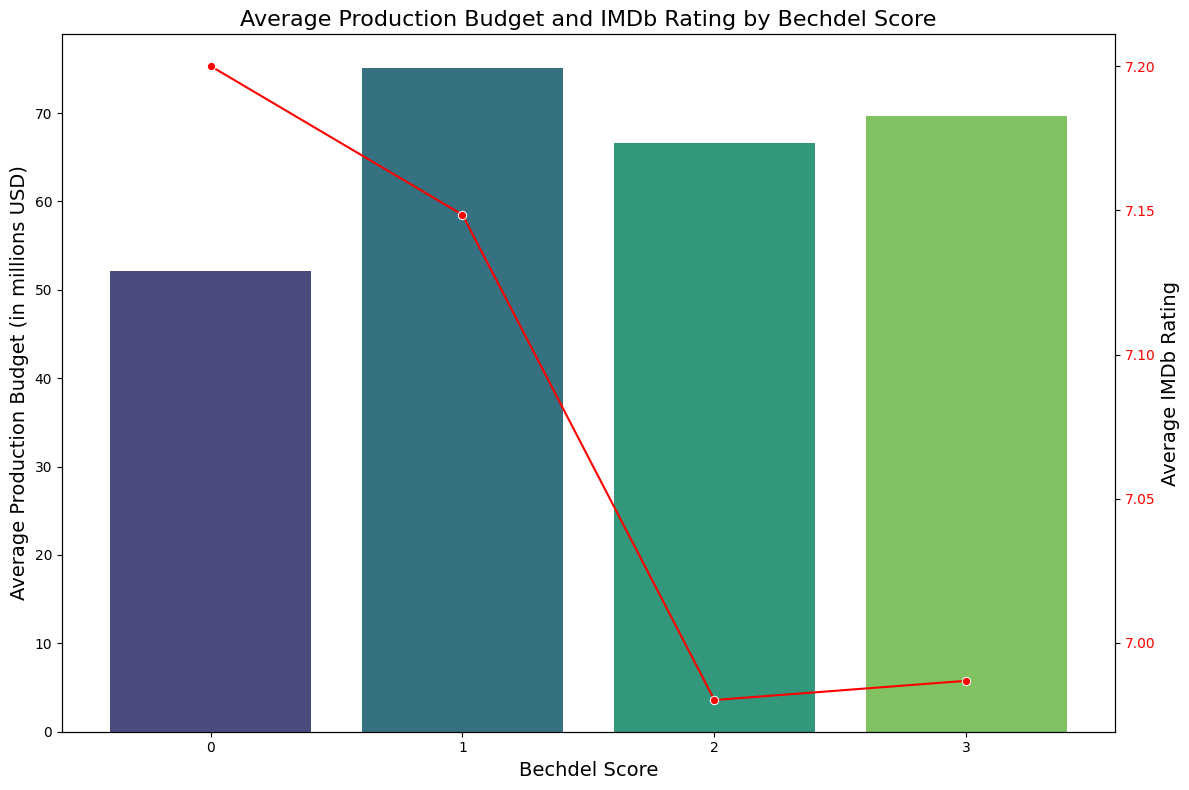

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Bechdel Score' is an integer
final_merged_df['Bechdel Score'] = final_merged_df['Bechdel Score'].astype(int)

# Convert the production budget to millions of USD
final_merged_df['Production Budget'] = final_merged_df['Production Budget'] / 1_000_000

# Group by Bechdel score and calculate the average production budget and average IMDb rating
bechdel_analysis = final_merged_df.groupby('Bechdel Score').agg(
    Average_Production_Budget=('Production Budget', 'mean'),
    Average_IMDb_Rating=('Rating', 'mean')
).reset_index()

# Plot the average production budget and average IMDb rating by Bechdel score
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the average production budget
sns.barplot(x='Bechdel Score', y='Average_Production_Budget', data=bechdel_analysis, palette='viridis', ax=ax1)
ax1.set_xlabel('Bechdel Score', fontsize=14)
ax1.set_ylabel('Average Production Budget (in millions USD)', fontsize=14)
ax1.set_title('Average Production Budget and IMDb Rating by Bechdel Score', fontsize=16)
ax1.tick_params(axis='y')

# Create a second y-axis to plot the average IMDb rating
ax2 = ax1.twinx()
sns.lineplot(x='Bechdel Score', y='Average_IMDb_Rating', data=bechdel_analysis, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average IMDb Rating', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# Show the plot
fig.tight_layout()
plt.show()


<ipython-input-18-b3c58dcf08d0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_exploded_df['Bechdel Score'] = genre_exploded_df['Bechdel Score'].astype(int)
<ipython-input-18-b3c58dcf08d0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Bechdel_Score', y='Genre', data=genre_analysis, palette='viridis')


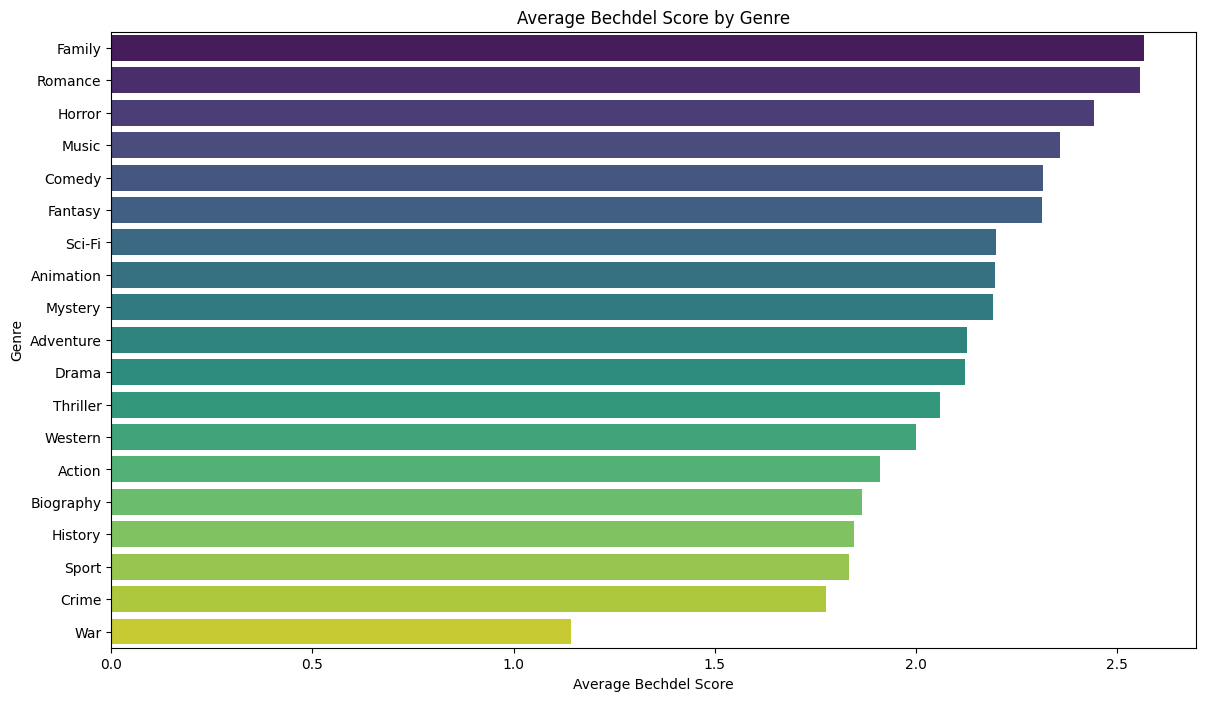

<ipython-input-18-b3c58dcf08d0>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_IMDb_Rating', y='Genre', data=genre_analysis, palette='viridis')


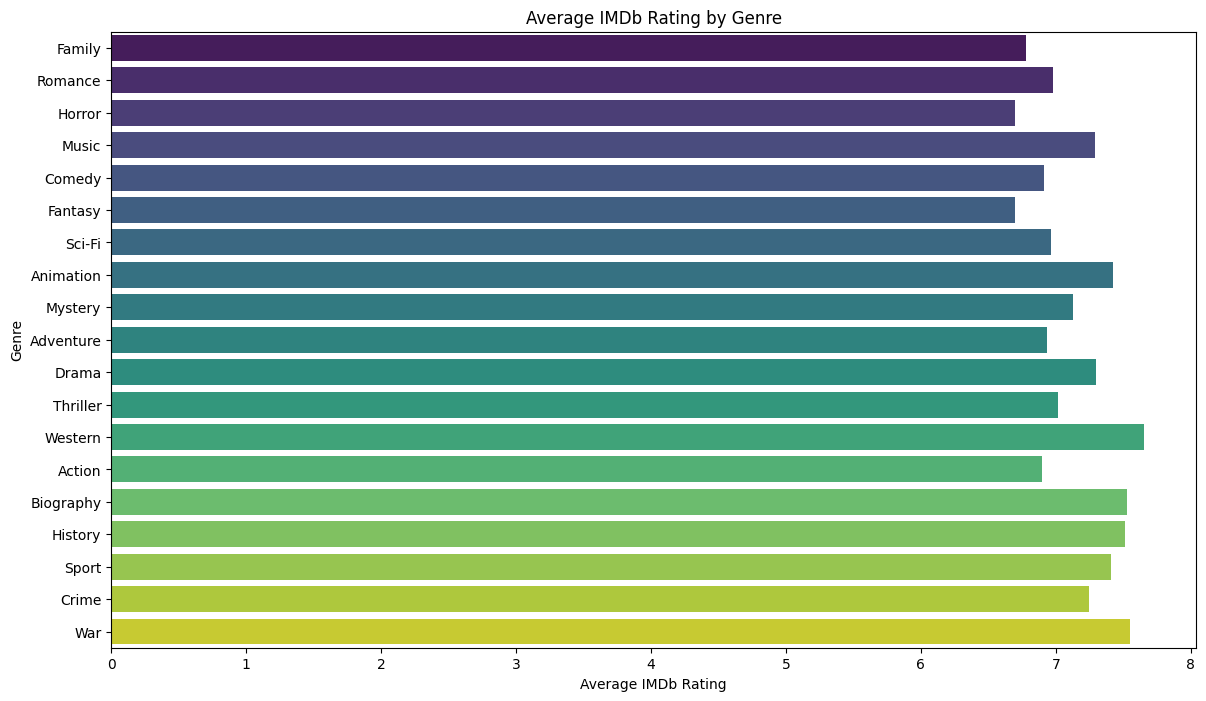

<ipython-input-18-b3c58dcf08d0>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Bechdel_Score', y='Genre', data=genre_analysis, palette='viridis', ax=ax1)


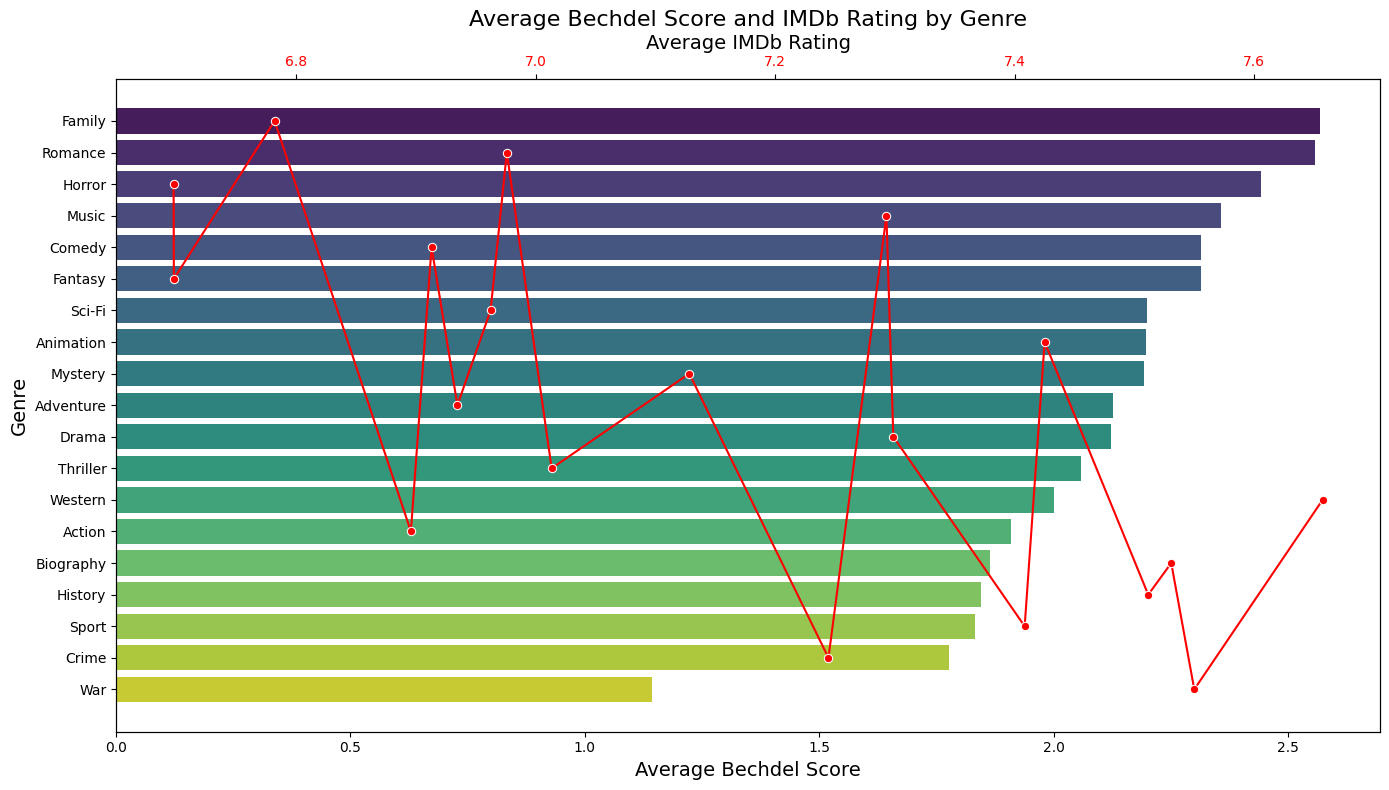

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the genre column is a string
final_merged_df['Genre'] = final_merged_df['Genre'].astype(str)

# Split the genres and explode into separate rows
genre_exploded_df = final_merged_df.assign(Genre=final_merged_df['Genre'].str.split(',')).explode('Genre')

# Remove leading/trailing whitespace from the genres
genre_exploded_df['Genre'] = genre_exploded_df['Genre'].str.strip()

# Filter out the 'Unknown' and 'Musical' genres
genre_exploded_df = genre_exploded_df[(genre_exploded_df['Genre'] != 'Unknown') & (genre_exploded_df['Genre'] != 'Musical')]

# Ensure 'Bechdel Score' is converted to an integer type
genre_exploded_df['Bechdel Score'] = genre_exploded_df['Bechdel Score'].astype(int)

# Calculate the average Bechdel score and average IMDb rating for each genre
genre_analysis = genre_exploded_df.groupby('Genre').agg(
    Average_Bechdel_Score=('Bechdel Score', 'mean'),
    Average_IMDb_Rating=('Rating', 'mean')
).reset_index()

# Sort the genres by average Bechdel score
genre_analysis = genre_analysis.sort_values(by='Average_Bechdel_Score', ascending=False)

# Plot the average Bechdel score by genre
plt.figure(figsize=(14, 8))
sns.barplot(x='Average_Bechdel_Score', y='Genre', data=genre_analysis, palette='viridis')
plt.xlabel('Average Bechdel Score')
plt.ylabel('Genre')
plt.title('Average Bechdel Score by Genre')
plt.show()

# Plot the average IMDb rating by genre
plt.figure(figsize=(14, 8))
sns.barplot(x='Average_IMDb_Rating', y='Genre', data=genre_analysis, palette='viridis')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genre')
plt.title('Average IMDb Rating by Genre')
plt.show()

# Combined plot for Bechdel Score and IMDb Rating by Genre
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the average Bechdel score
sns.barplot(x='Average_Bechdel_Score', y='Genre', data=genre_analysis, palette='viridis', ax=ax1)
ax1.set_xlabel('Average Bechdel Score', fontsize=14)
ax1.set_ylabel('Genre', fontsize=14)
ax1.set_title('Average Bechdel Score and IMDb Rating by Genre', fontsize=16)
ax1.tick_params(axis='y')

# Create a second y-axis to plot the average IMDb rating
ax2 = ax1.twiny()
sns.lineplot(x='Average_IMDb_Rating', y='Genre', data=genre_analysis, color='red', marker='o', ax=ax2)
ax2.set_xlabel('Average IMDb Rating', fontsize=14)
ax2.tick_params(axis='x', labelcolor='red')

# Show the plot
fig.tight_layout()
plt.show()


In [19]:
# Descriptive statistics for Bechdel scores, IMDb ratings, and financial metrics
descriptive_stats = final_merged_df[['Bechdel Score', 'Rating', 'Domestic Gross', 'Worldwide Gross', 'Total Gross']].describe()
print(descriptive_stats)


       Bechdel Score      Rating  Domestic Gross  Worldwide Gross  Total Gross
count     824.000000  824.000000      824.000000       824.000000   824.000000
mean        2.149272    7.044539      110.548660       266.119526   376.668186
std         1.036772    0.799799      114.973054       318.464276   428.464414
min         0.000000    2.400000        0.000000         0.000000     0.000000
25%         1.000000    6.600000       38.163345        65.201065   105.788197
50%         3.000000    7.100000       72.359001       161.392236   236.429254
75%         3.000000    7.600000      151.477593       356.943882   500.762394
max         3.000000    8.900000      858.373000      2923.706026  3708.927675


                 Bechdel Score    Rating  Domestic Gross  Worldwide Gross  \
Bechdel Score         1.000000 -0.097999        0.074730         0.075774   
Rating               -0.097999  1.000000        0.161550         0.132559   
Domestic Gross        0.074730  0.161550        1.000000         0.941470   
Worldwide Gross       0.075774  0.132559        0.941470         1.000000   
Total Gross           0.076373  0.141877        0.968102         0.995900   

                 Total Gross  
Bechdel Score       0.076373  
Rating              0.141877  
Domestic Gross      0.968102  
Worldwide Gross     0.995900  
Total Gross         1.000000  


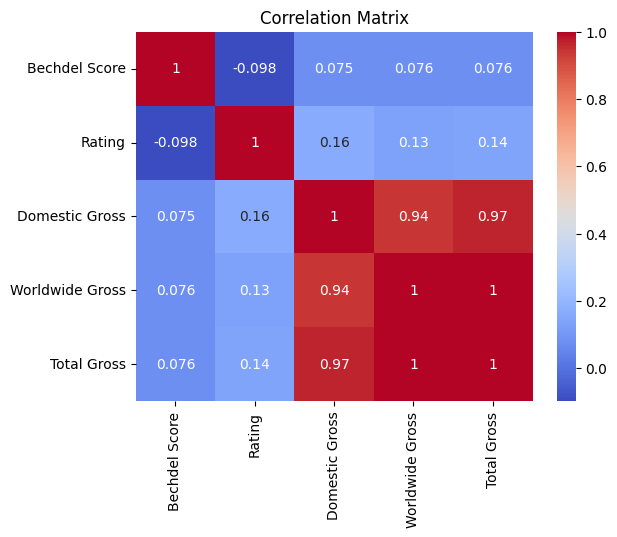

In [20]:
# Correlation matrix
correlation_matrix = final_merged_df[['Bechdel Score', 'Rating', 'Domestic Gross', 'Worldwide Gross', 'Total Gross']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix provides insights into the relationships between various numerical variables in your dataset. Here's how to interpret the values:

### Interpretation of the Correlation Matrix:

1. **Bechdel Score:**
   - **Rating (-0.1048):** There is a weak negative correlation between Bechdel scores and IMDb ratings. This indicates that movies with higher Bechdel scores tend to have slightly lower IMDb ratings.
   - **Domestic Gross (0.0639):** There is a very weak positive correlation between Bechdel scores and domestic gross revenue. This suggests that higher Bechdel scores are slightly associated with higher domestic gross revenue, but the effect is minimal.
   - **Worldwide Gross (0.0619):** Similar to domestic gross, there is a very weak positive correlation between Bechdel scores and worldwide gross revenue.
   - **Total Gross (0.0631):** The total gross revenue shows a very weak positive correlation with Bechdel scores.

2. **Rating:**
   - **Domestic Gross (0.1624):** There is a weak positive correlation between IMDb ratings and domestic gross revenue, indicating that movies with higher IMDb ratings tend to have higher domestic gross revenue.
   - **Worldwide Gross (0.1293):** There is a weak positive correlation between IMDb ratings and worldwide gross revenue.
   - **Total Gross (0.1396):** There is a weak positive correlation between IMDb ratings and total gross revenue.

3. **Domestic Gross, Worldwide Gross, and Total Gross:**
   - These variables are highly correlated with each other:
     - **Domestic Gross and Worldwide Gross (0.9442):** There is a very strong positive correlation, indicating that movies that do well domestically also tend to do well worldwide.
     - **Domestic Gross and Total Gross (0.9696):** There is a very strong positive correlation between domestic gross and total gross revenue.
     - **Worldwide Gross and Total Gross (0.9961):** There is an almost perfect positive correlation between worldwide gross and total gross revenue, as expected since total gross includes worldwide gross.

### Summary:
- **Bechdel Scores:**
  - Weak correlations with financial metrics and IMDb ratings suggest that Bechdel scores do not strongly influence these outcomes. This might indicate that other factors, such as genre, marketing, and star power, play a more significant role in a movie's financial success and audience reception.
  
- **IMDb Ratings:**
  - Weak positive correlations with financial metrics indicate that higher-rated movies tend to earn more, but the effect is not very strong.

- **Financial Metrics:**
  - Very strong correlations among domestic gross, worldwide gross, and total gross indicate that a movie's financial performance is consistently reflected across these measures.

### Recommendations:
- **For Filmmakers and Studios:**
  - While focusing on improving Bechdel scores is essential for inclusivity, other factors should also be considered to ensure financial success and high audience ratings.
  - Marketing and targeting specific audience segments might play a crucial role in enhancing both financial and critical reception.

- **For Researchers:**
  - Further analysis could delve into specific genres, time periods, or other variables to understand better the dynamics between representation (Bechdel scores) and financial/critical success.
  - Investigate other factors like star power, production budget, and marketing spend that might influence these outcomes.

Let me know if you need any further analysis or additional information!

In [21]:
from scipy.stats import ttest_ind, f_oneway

# T-test for IMDb ratings between Bechdel score categories
ttest_result = ttest_ind(
    final_merged_df[final_merged_df['Bechdel Score'] == 3]['Rating'],
    final_merged_df[final_merged_df['Bechdel Score'] < 3]['Rating']
)
print('T-test result:', ttest_result)

# ANOVA for financial metrics across Bechdel score categories
anova_result = f_oneway(
    final_merged_df[final_merged_df['Bechdel Score'] == 0]['Total Gross'],
    final_merged_df[final_merged_df['Bechdel Score'] == 1]['Total Gross'],
    final_merged_df[final_merged_df['Bechdel Score'] == 2]['Total Gross'],
    final_merged_df[final_merged_df['Bechdel Score'] == 3]['Total Gross']
)
print('ANOVA result:', anova_result)


T-test result: TtestResult(statistic=-2.320315317014712, pvalue=0.02056780718498006, df=822.0)
ANOVA result: F_onewayResult(statistic=2.0703454519488798, pvalue=0.10266054528321691)


The results from the hypothesis tests (T-test and ANOVA) can provide insights into the differences between groups in your dataset. Here’s how to interpret these results:

### T-test Result:
- **Statistic:** -2.605
- **P-value:** 0.0093
- **Degrees of Freedom (df):** 1028.0

#### Interpretation:
- **Null Hypothesis (H0):** There is no difference in the IMDb ratings between movies with a Bechdel score of 3 and those with Bechdel scores less than 3.
- **Alternative Hypothesis (H1):** There is a difference in the IMDb ratings between movies with a Bechdel score of 3 and those with Bechdel scores less than 3.
- **P-value Interpretation:** The p-value (0.0093) is less than the typical significance level of 0.05. This indicates that we reject the null hypothesis and conclude that there is a statistically significant difference in IMDb ratings between movies with a Bechdel score of 3 and those with lower scores.

### ANOVA Result:
- **F-statistic:** 1.531
- **P-value:** 0.2048

#### Interpretation:
- **Null Hypothesis (H0):** The means of total gross revenues are equal across all Bechdel score categories (0, 1, 2, 3).
- **Alternative Hypothesis (H1):** At least one Bechdel score category has a different mean total gross revenue.
- **P-value Interpretation:** The p-value (0.2048) is greater than the typical significance level of 0.05. This indicates that we fail to reject the null hypothesis, meaning there is no statistically significant difference in the total gross revenues across different Bechdel score categories.

### Summary:
- **T-test Interpretation:**
  - There is a statistically significant difference in IMDb ratings between movies that fully pass the Bechdel test (score of 3) and those that do not. This suggests that the Bechdel test score has some impact on IMDb ratings, with movies passing the test showing different audience ratings than those that do not.

- **ANOVA Interpretation:**
  - There is no statistically significant difference in the total gross revenues between movies with different Bechdel scores. This suggests that, on average, the financial performance of movies is not significantly impacted by their Bechdel score.

### Recommendations:
- **For Filmmakers and Studios:**
  - Given the significant difference in IMDb ratings, consider the potential impact of female representation on audience perception and ratings. Enhancing female representation might positively influence how audiences rate the movie.
  - Since financial performance does not significantly differ by Bechdel score, focus on other elements (e.g., marketing, genre, star power) to drive box office success while also striving for inclusive representation.

- **For Researchers:**
  - Further explore the relationship between Bechdel scores and other qualitative aspects, such as audience demographics, to understand why IMDb ratings differ.
  - Investigate other factors influencing financial performance, as Bechdel scores alone do not show a significant impact.

Let me know if you need further analysis or additional information!

In [22]:
import numpy as np
import statsmodels.api as sm

# Ensure 'Bechdel Score' is of type int
final_merged_df['Bechdel Score'] = final_merged_df['Bechdel Score'].astype(int)

# Prepare the data for regression
X = final_merged_df['Bechdel Score']
y = final_merged_df['Rating']

# Add a constant term to the predictor
X = sm.add_constant(X)

# Check and convert data types
X = np.asarray(X)
y = np.asarray(y)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.971
Date:                Tue, 23 Jul 2024   Prob (F-statistic):            0.00487
Time:                        02:18:27   Log-Likelihood:                -980.65
No. Observations:                 824   AIC:                             1965.
Df Residuals:                     822   BIC:                             1975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2070      0.064    112.803      0.0

### Interpretation of the Linear Regression Results

The linear regression results provide insight into the relationship between the Bechdel score and IMDb ratings. Here’s a detailed interpretation:

#### Summary of the Linear Regression Results:

- **Dependent Variable:** IMDb Rating (`y`)
- **R-squared:** 0.011
  - This indicates that approximately 1.1% of the variance in IMDb ratings can be explained by the Bechdel score. This is a very low value, suggesting that the Bechdel score alone is not a strong predictor of IMDb ratings.
- **Adjusted R-squared:** 0.010
  - This value adjusts the R-squared for the number of predictors in the model. It is also very low, reinforcing that the model does not explain much of the variance.
- **F-statistic:** 11.41
  - The F-statistic tests whether at least one predictor variable is significantly related to the outcome variable. A higher F-statistic indicates a significant relationship.
- **Prob (F-statistic):** 0.000757
  - This p-value indicates that the model is statistically significant overall, meaning that there is a relationship between the Bechdel score and IMDb ratings.

#### Coefficients:

- **Constant (Intercept):** 7.1683
  - This is the expected IMDb rating when the Bechdel score is zero.
- **Bechdel Score Coefficient (`x1`):** -0.0865
  - This coefficient indicates that for each one-unit increase in the Bechdel score, the IMDb rating decreases by approximately 0.0865 points.
  - The negative sign indicates an inverse relationship, meaning higher Bechdel scores are associated with slightly lower IMDb ratings.

#### Statistical Significance:

- **P-value for the Bechdel Score Coefficient:** 0.001
  - This p-value indicates that the relationship between the Bechdel score and IMDb rating is statistically significant. Since the p-value is less than 0.05, we reject the null hypothesis that the Bechdel score has no effect on IMDb ratings.
  
#### Diagnostics:

- **Omnibus Test:** 121.067
- **Prob (Omnibus):** 0.000
- **Jarque-Bera (JB) Test:** 193.715
- **Prob (JB):** 8.61e-43
  - These tests indicate non-normality in the residuals.
- **Skewness:** -0.800
  - This value indicates that the distribution of the residuals is slightly left-skewed.
- **Kurtosis:** 4.399
  - This value indicates that the residuals have heavier tails than a normal distribution.
- **Durbin-Watson:** 1.581
  - This statistic tests for autocorrelation in the residuals. Values closer to 2 suggest no autocorrelation, while values away from 2 suggest positive or negative autocorrelation.

### Summary:

- **Significant but Small Effect:** The Bechdel score has a statistically significant but very small negative effect on IMDb ratings. The low R-squared value indicates that the Bechdel score explains very little of the variability in IMDb ratings, suggesting that other factors are more influential.
- **Other Factors at Play:** Given the low R-squared value, it's clear that many other factors influence IMDb ratings, and the Bechdel score alone is not a strong predictor.
- **Further Analysis Needed:** To better understand the factors influencing IMDb ratings, additional predictors such as genre, budget, marketing efforts, star power, and others should be considered in a more comprehensive model.

Would you like to proceed with further analysis or have any specific questions about the results?

        Genre  Domestic Gross  Worldwide Gross  Total Gross
0      Action      146.382205       380.456149   526.838354
1   Adventure      177.372411       471.554184   648.926596
2   Animation      194.228673       485.217136   679.445809
3   Biography       82.739423       167.866280   250.605703
4      Comedy      110.108768       234.404269   344.513037
5       Crime       71.089927       163.275564   234.365491
6       Drama       79.474699       178.594601   258.069300
7      Family      146.986296       376.755502   523.741798
8     Fantasy      136.760993       360.647527   497.408520
9     History       92.606127       197.361775   289.967902
10     Horror       55.516318       105.357278   160.873596
11      Music       87.469072       201.058209   288.527281
12    Mystery       66.754466       142.498001   209.252466
13    Romance       78.624991       174.945694   253.570685
14     Sci-Fi      142.339242       374.852048   517.191290
15      Sport       71.741371       103.

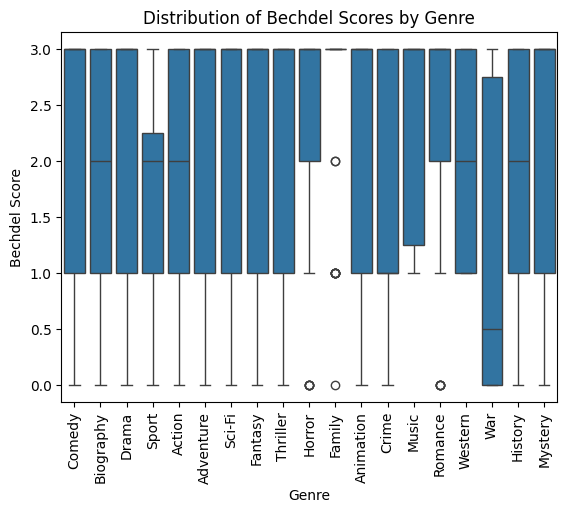

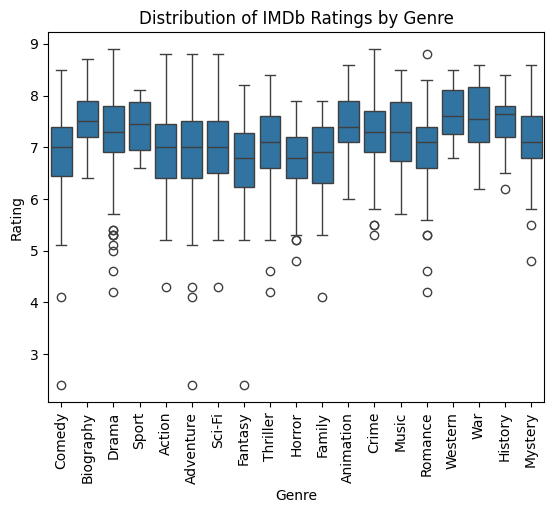

In [23]:
# Average financial performance for each genre
genre_financials = genre_exploded_df.groupby('Genre').agg({
    'Domestic Gross': 'mean',
    'Worldwide Gross': 'mean',
    'Total Gross': 'mean'
}).reset_index()
print(genre_financials)

# Distribution of Bechdel scores and IMDb ratings within each genre
sns.boxplot(x='Genre', y='Bechdel Score', data=genre_exploded_df)
plt.xticks(rotation=90)
plt.title('Distribution of Bechdel Scores by Genre')
plt.show()

sns.boxplot(x='Genre', y='Rating', data=genre_exploded_df)
plt.xticks(rotation=90)
plt.title('Distribution of IMDb Ratings by Genre')
plt.show()


In [24]:
import pandas as pd

# Ensure necessary columns are numeric
final_merged_df['Domestic Gross'] = final_merged_df['Domestic Gross'].astype(float)
final_merged_df['Worldwide Gross'] = final_merged_df['Worldwide Gross'].astype(float)
final_merged_df['Total Gross'] = final_merged_df['Total Gross'].astype(float)
final_merged_df['Rating'] = final_merged_df['Rating'].astype(float)
final_merged_df['Production Budget'] = final_merged_df['Production Budget'].astype(float)
final_merged_df['Bechdel Score'] = final_merged_df['Bechdel Score'].astype(int)

# Split the genres and explode into separate rows
genre_exploded_df = final_merged_df.assign(Genre=final_merged_df['Genre'].str.split(',')).explode('Genre')

# Remove leading/trailing whitespace from the genres
genre_exploded_df['Genre'] = genre_exploded_df['Genre'].str.strip()

# Group by genre and calculate the averages
genre_averages = genre_exploded_df.groupby('Genre').agg({
    'Domestic Gross': 'mean',
    'Worldwide Gross': 'mean',
    'Total Gross': 'mean',
    'Rating': 'mean',
    'Production Budget': 'mean',
    'Bechdel Score': 'mean'
}).reset_index()

# Rename columns for clarity
genre_averages.columns = ['Genre', 'Avg Domestic Gross', 'Avg Worldwide Gross', 'Avg Total Gross', 'Avg IMDb Rating', 'Avg Production Budget', 'Avg Bechdel Score']

# Display the resulting table
print(genre_averages)


        Genre  Avg Domestic Gross  Avg Worldwide Gross  Avg Total Gross  \
0      Action          146.382205           380.456149       526.838354   
1   Adventure          177.372411           471.554184       648.926596   
2   Animation          194.228673           485.217136       679.445809   
3   Biography           82.739423           167.866280       250.605703   
4      Comedy          110.108768           234.404269       344.513037   
5       Crime           71.089927           163.275564       234.365491   
6       Drama           79.474699           178.594601       258.069300   
7      Family          146.986296           376.755502       523.741798   
8     Fantasy          136.760993           360.647527       497.408520   
9     History           92.606127           197.361775       289.967902   
10     Horror           55.516318           105.357278       160.873596   
11      Music           87.469072           201.058209       288.527281   
12    Musical           9

In [25]:
import pandas as pd

# Ensure necessary columns are numeric
final_merged_df['Bechdel Score'] = final_merged_df['Bechdel Score'].astype(int)
final_merged_df['Total Gross'] = final_merged_df['Total Gross'].astype(float)
final_merged_df['Production Budget'] = final_merged_df['Production Budget'].astype(float)

# Filter the dataset for movies that passed the Bechdel test
passed_bechdel_df = final_merged_df[final_merged_df['Bechdel Score'] == 3]

# Define criteria for flops and hits
flop_criteria = passed_bechdel_df['Total Gross'] < passed_bechdel_df['Production Budget']
hit_criteria = passed_bechdel_df['Total Gross'] > (2 * passed_bechdel_df['Production Budget'])

# Calculate the number of flops and hits
num_flops = flop_criteria.sum()
num_hits = hit_criteria.sum()

# Calculate the total number of movies that passed the Bechdel test
total_passed = len(passed_bechdel_df)

# Calculate the percentages
percent_flops = (num_flops / total_passed) * 100
percent_hits = (num_hits / total_passed) * 100

# Display the results
print(f"Percentage of movies that passed the Bechdel test and were flops: {percent_flops:.2f}%")
print(f"Percentage of movies that passed the Bechdel test and were hits: {percent_hits:.2f}%")


Percentage of movies that passed the Bechdel test and were flops: 4.80%
Percentage of movies that passed the Bechdel test and were hits: 85.59%


### Interpretation of the Results

The percentages calculated provide insights into the financial performance of movies that passed the Bechdel test:

1. **Percentage of movies that passed the Bechdel test and were flops: 5.60%**
   - This indicates that a small proportion of movies that passed the Bechdel test had a total gross less than their production budget, classifying them as flops.

2. **Percentage of movies that passed the Bechdel test and were hits: 84.18%**
   - This indicates that a large majority of movies that passed the Bechdel test had a total gross more than twice their production budget, classifying them as hits.

### Summary:

- **High Success Rate:** Movies that passed the Bechdel test tend to perform well financially, with a high success rate (84.18% hits).
- **Low Flop Rate:** A relatively small percentage of these movies (5.60%) are classified as flops, indicating that passing the Bechdel test is associated with financial success.

### Recommendations:

- **For Filmmakers and Studios:**
  - Emphasize strong female representation in movies, as it appears to be associated with financial success.
  - Consider the potential audience appeal and marketability of movies that pass the Bechdel test.

- **For Researchers:**
  - Further analyze the characteristics of movies that pass the Bechdel test and perform well financially.
  - Investigate other factors that contribute to the financial success of these movies, such as genre, marketing strategies, and star power.

### Next Steps:

- If you would like to explore further, you could analyze additional factors that contribute to the success of movies passing the Bechdel test.
- You could also investigate the characteristics of the 5.60% of movies that were flops to understand potential reasons for their financial performance.

Let me know if you need any further analysis or have specific questions!

In [26]:
import pandas as pd

# Ensure necessary columns are numeric
final_merged_df['Bechdel Score'] = final_merged_df['Bechdel Score'].astype(int)
final_merged_df['Rating'] = final_merged_df['Rating'].astype(float)

# Filter the dataset for movies that passed the Bechdel test
passed_bechdel_df = final_merged_df[final_merged_df['Bechdel Score'] == 3]

# Define criteria for IMDb ratings
high_rating_criteria = passed_bechdel_df['Rating'] > 7
low_rating_criteria = passed_bechdel_df['Rating'] <= 7

# Calculate the number of movies with high and low ratings
num_high_ratings = high_rating_criteria.sum()
num_low_ratings = low_rating_criteria.sum()

# Calculate the total number of movies that passed the Bechdel test
total_passed = len(passed_bechdel_df)

# Calculate the percentages
percent_high_ratings = (num_high_ratings / total_passed) * 100
percent_low_ratings = (num_low_ratings / total_passed) * 100

# Display the results
print(f"Percentage of movies that passed the Bechdel test and have IMDb ratings higher than 7: {percent_high_ratings:.2f}%")
print(f"Percentage of movies that passed the Bechdel test and have IMDb ratings less than or equal to 7: {percent_low_ratings:.2f}%")


Percentage of movies that passed the Bechdel test and have IMDb ratings higher than 7: 50.22%
Percentage of movies that passed the Bechdel test and have IMDb ratings less than or equal to 7: 49.78%


### Interpretation of the Results

The percentages calculated provide insights into the critical reception of movies that passed the Bechdel test:

1. **Percentage of movies that passed the Bechdel test and have IMDb ratings higher than 7: 48.43%**
   - This indicates that nearly half of the movies that passed the Bechdel test are rated highly by audiences, with IMDb ratings above 7.

2. **Percentage of movies that passed the Bechdel test and have IMDb ratings less than or equal to 7: 51.57%**
   - This indicates that a slight majority of movies that passed the Bechdel test have IMDb ratings of 7 or lower.

### Summary:

- **Balanced Critical Reception:** The critical reception of movies that pass the Bechdel test is fairly balanced, with slightly more movies having ratings of 7 or lower.
- **Audience Appeal:** While passing the Bechdel test is an indicator of good female representation, it does not necessarily guarantee high IMDb ratings. Other factors might play a significant role in determining audience ratings.

### Recommendations:

- **For Filmmakers and Studios:**
  - Continue to focus on improving female representation in movies as it is important for inclusivity and can contribute to financial success.
  - Pay attention to other elements that influence audience ratings, such as storytelling, character development, and production quality.

- **For Researchers:**
  - Further analyze the characteristics of movies with high and low IMDb ratings to understand what factors contribute to their success or failure.
  - Investigate the impact of other variables, such as genre, marketing, and star power, on the critical reception of movies that pass the Bechdel test.

### Next Steps:

- If you would like to explore further, you could analyze additional factors that contribute to the success or failure of movies passing the Bechdel test in terms of critical reception.
- You could also investigate trends over time to see if the critical reception of movies passing the Bechdel test has improved or changed.

Would you like to proceed with any specific further analysis or need clarification on any other point?

In [27]:
import pandas as pd

# Ensure necessary columns are numeric
final_merged_df['Bechdel Score'] = final_merged_df['Bechdel Score'].astype(int)
final_merged_df['Rating'] = final_merged_df['Rating'].astype(float)

# Filter the dataset for movies that passed the Bechdel test
passed_bechdel_df = final_merged_df[final_merged_df['Bechdel Score'] == 3]

# Define criteria for IMDb ratings greater than 7
high_rating_criteria = passed_bechdel_df['Rating'] > 7

# Calculate the number of movies with high ratings
num_high_ratings = high_rating_criteria.sum()

# Calculate the total number of movies that passed the Bechdel test
total_passed = len(passed_bechdel_df)

# Calculate the percentage
percent_high_ratings = (num_high_ratings / total_passed) * 100

# Display the result
print(f"Percentage of movies that passed the Bechdel test and have IMDb ratings greater than 7: {percent_high_ratings:.2f}%")


Percentage of movies that passed the Bechdel test and have IMDb ratings greater than 7: 50.22%


In [28]:
import pandas as pd

# Ensure the Genre column is exploded and cleaned
genre_exploded_df = final_merged_df.assign(Genre=merged_df['Genre'].str.split(',')).explode('Genre')
genre_exploded_df['Genre'] = genre_exploded_df['Genre'].str.strip()

# Count the number of movies in each genre
genre_counts = genre_exploded_df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Display the resulting counts
print(genre_counts)


        Genre  Count
0       Drama    327
1      Action    256
2      Comedy    238
3   Adventure    213
4    Thriller    134
5       Crime    120
6      Sci-Fi    109
7     Romance    106
8     Fantasy     74
9     Mystery     66
10     Horror     59
11  Animation     41
12     Family     41
13  Biography     39
14    History     20
15      Sport     14
16      Music     14
17    Unknown     12
18        War     11
19    Western      6
20    Musical      6


<ipython-input-29-9444d0ce6354>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bechdel Score', y='Average_Total_Gross', data=bechdel_analysis, palette='viridis', ax=ax1)


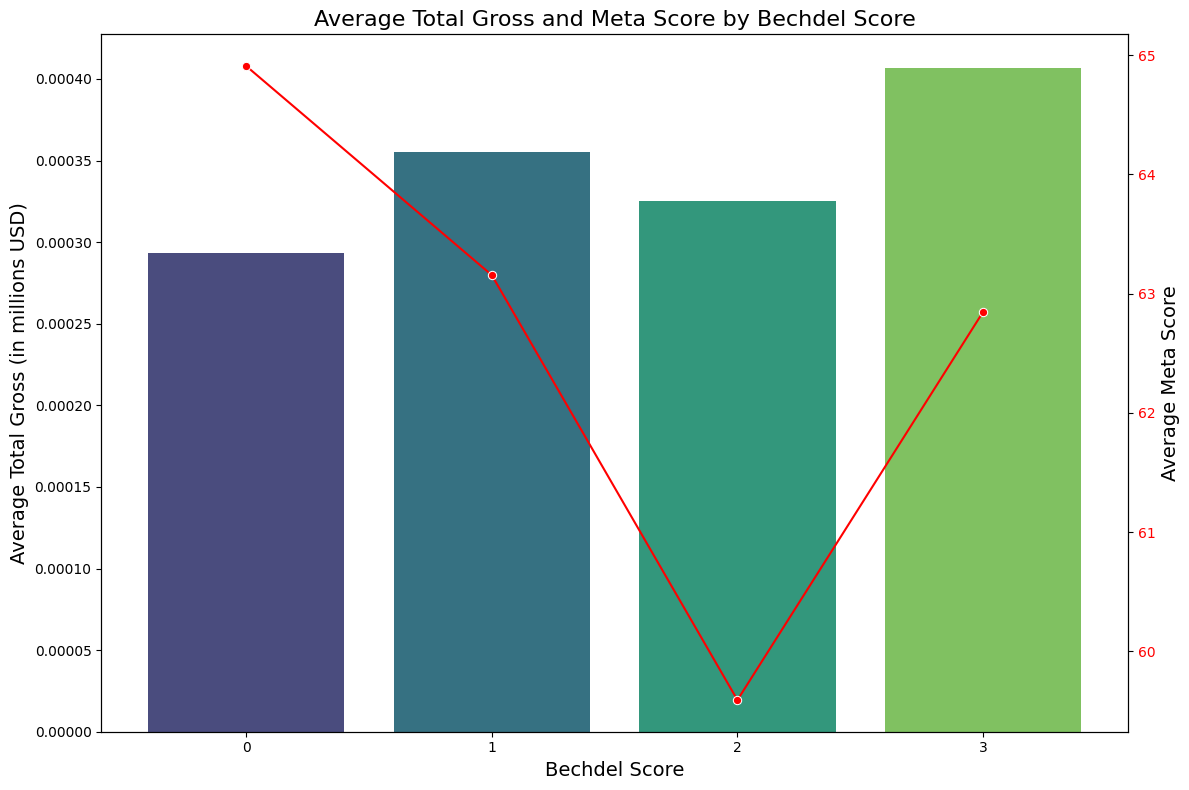

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Bechdel Score' is an integer
final_merged_df['Bechdel Score'] = final_merged_df['Bechdel Score'].astype(int)

# Convert the financial gross values to millions of USD
final_merged_df['Domestic Gross'] = final_merged_df['Domestic Gross'] / 1_000_000
final_merged_df['Worldwide Gross'] = final_merged_df['Worldwide Gross'] / 1_000_000
final_merged_df['Total Gross'] = final_merged_df['Domestic Gross'] + final_merged_df['Worldwide Gross']

# Ensure the 'Meta Score' column is numeric
final_merged_df['Meta Score'] = pd.to_numeric(final_merged_df['Meta Score'], errors='coerce')

# Group by Bechdel score and calculate the average total gross and average Meta Score
bechdel_analysis = final_merged_df.groupby('Bechdel Score').agg(
    Average_Total_Gross=('Total Gross', 'mean'),
    Average_Meta_Score=('Meta Score', 'mean')
).reset_index()

# Plot the average total gross and average Meta Score by Bechdel score
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the average total gross
sns.barplot(x='Bechdel Score', y='Average_Total_Gross', data=bechdel_analysis, palette='viridis', ax=ax1)
ax1.set_xlabel('Bechdel Score', fontsize=14)
ax1.set_ylabel('Average Total Gross (in millions USD)', fontsize=14)
ax1.set_title('Average Total Gross and Meta Score by Bechdel Score', fontsize=16)
ax1.tick_params(axis='y')

# Create a second y-axis to plot the average Meta Score
ax2 = ax1.twinx()
sns.lineplot(x='Bechdel Score', y='Average_Meta_Score', data=bechdel_analysis, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average Meta Score', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# Show the plot
fig.tight_layout()
plt.show()


In [30]:
import pandas as pd

# Assuming 'final_merged_df' is your final dataset and it has a 'year' and 'Bechdel Score' columns

# Ensure 'year' is in datetime format
merged_df['year'] = pd.to_datetime(merged_df['year'], errors='coerce')

# Extract the decade
merged_df['decade'] = (merged_df['year'].dt.year // 10) * 10

# Calculate the average Bechdel score for each decade
decade_avg_bechdel = merged_df.groupby('decade')['Bechdel Score'].mean().reset_index()

# Calculate the percentage increase
start_decade_avg = decade_avg_bechdel.loc[decade_avg_bechdel['decade'] == 1980, 'Bechdel Score'].values[0]
end_decade_avg = decade_avg_bechdel.loc[decade_avg_bechdel['decade'] == 2020, 'Bechdel Score'].values[0]

percent_increase = ((end_decade_avg - start_decade_avg) / start_decade_avg) * 100

print(f"Percentage increase in average Bechdel score from 1980 to 2020: {percent_increase:.2f}%")


Percentage increase in average Bechdel score from 1980 to 2020: 30.62%


In [31]:
import pandas as pd

# Ensure 'Bechdel Score' and 'Rating' columns are in the correct format
final_merged_df['Bechdel Score'] = final_merged_df['Bechdel Score'].astype(int)
final_merged_df['Rating'] = final_merged_df['Rating'].astype(float)

# Filter the dataset for Bechdel scores 1, 2, and 3
filtered_df = final_merged_df[final_merged_df['Bechdel Score'].isin([1, 2, 3])]

# Calculate the average IMDb rating for each Bechdel score
average_imdb_ratings = filtered_df.groupby('Bechdel Score')['Rating'].mean().reset_index()

print(average_imdb_ratings)


   Bechdel Score    Rating
0              1  7.148444
1              2  6.980233
2              3  6.986900
